# CHANGELOG generation and Milestone analysis

This script is here to make the process of generating and updating the `CHANGELOG` file of the [Friendica](https://friendi.ca) project more easy. The script will call the `github` API and collect all the nexxessary information from the Milestone and then sums them up in numbers and prefilled text blocks that can be used for the release notes and CHANGELOG file.

## Usage

1. Create an access token in your github account and save it in the file `token.txt` next to this jupyter notebook
2. Change the `milestone` variable to the correct integer identification value from the github milestone page and let all cells of the jupyter notebook run.

**Note** the script will not automatically generate the `CHANGELOG` section for the release. Instead it will summerize the work done during the milestone to make the manual work less cumbersome to create the section.

## Author

* Tobias Diekershoff <tobias.diekershoff@gmx.net>

## License (MIT / Expat style)

Copyright (c) 2019, Tobias Diekershoff

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

In [108]:
from github import Github
from matplotlib import pylab as plt
import seaborn as sns
sns.set_style("darkgrid")
pal = sns.color_palette("husl", 16)
from wordcloud import WordCloud

In [109]:
# get github token from token.txt file
with open('./token.txt','r') as file:
    ghtoken = file.readline().strip()
# current milestone
milestone = 18
# types of issues
bugfixes = []
enhancements = []
newfeatures = []
addonstuff = []
translation = []
closedissues = []
closedtitles = []
prcount = 0
issuecount = 0
alllabels = {}
allcontributors = {}
titlewords = []

In [110]:
# and login
gh = Github(ghtoken)
# open the friendica repository
repo = gh.get_repo('friendica/friendica')
ms = repo.get_milestone(milestone)
addonlabel = ms.title

## Friendica Core Repository

### Some basic stats

In [111]:
print('Milestone State: {}\nOpen / Close Issue: {}/{}'.format(ms.state, ms.open_issues, ms.closed_issues))

Milestone State: open
Open / Close Issue: 11/241


Now grap all issues of the milestone and sort them.

* are they issues or pull requests
* bug fixes, new features or enhancements

also collect the issue numbers of the (real) issues that got closed.

In [112]:
# get the "issues" from the milestone. Seperate pull requests from fixed issues and analyse them a bit.
for issue in repo.get_issues(milestone=ms, state='all'):
    ititle = issue.title
    titlewords.append(ititle)
    iauthor = issue.user.login
    lnames = []
    itype = ''
    for label in issue.labels:
        lnames.append(label.name)
    try:
        pr_url = issue.pull_request.html_url
        # This issue is actually a pull request
        itype = 'PR'
        prcount += 1
        if ('Bug' in lnames):
            bugfixes.append(ititle+' [{}] by {}'.format(", ".join(lnames), iauthor))
        if ('Addons' in lnames):
            addonstuff.append(ititle+' [{}] by {}'.format(", ".join(lnames), iauthor))
        if ('Translation' in lnames):
            translation.append(ititle+' [{}] by {}'.format(", ".join(lnames), iauthor))
        if ('New Feature' in lnames):
            newfeatures.append(ititle+' [{}] by {}'.format(", ".join(lnames), iauthor))
        if ('Enhancement' in lnames):
            enhancements.append(ititle+' [{}] by {}'.format(", ".join(lnames), iauthor))
        allcontributors[iauthor] = allcontributors.get(iauthor, 0) + 1
        for l in lnames:
            alllabels[l] = alllabels.get(l, 0) + 1
    except:
        # this issue is actually an issue
        itype = 'ISSUE'
        issuecount += 1
        if issue.state == 'closed':
            closedissues.append(int(issue.number))
            closedtitles.append(ititle)
closedissues.sort()

### Closed Issues

First of all, number countings.

In [113]:
print('\n\nTotal: Pull Requests / Issues: {} / {}'.format(prcount, issuecount))



Total: Pull Requests / Issues: 190 / 62


In [114]:
print(closedissues)

print('\n====================\nIssue Titles\n====================')
for i in closedtitles:
    print(i)

[989, 1071, 1188, 1334, 2537, 3229, 3231, 3385, 4112, 4442, 4451, 5048, 5568, 5802, 6865, 7190, 7308, 7316, 7418, 7613, 7657, 7659, 7671, 7679, 7681, 7682, 7688, 7691, 7702, 7707, 7709, 7718, 7733, 7740, 7747, 7756, 7766, 7773, 7776, 7778, 7781, 7821, 7825, 7834, 7863, 7868, 7880, 7888, 7902, 7914, 7920, 7946, 7953]

Issue Titles
[frio] Self contact hovercard shouldn’t show follow and private message action buttons
frio: visual glitch with 'active tab indicator' on .../contact/123456
[API] Rewrite followers/ids and friends/ids to output expected data
Resharing a Mastodon post truncates body, breaks share display
[frio] Composer Modal jot new permission tab doesn't show connectors
addon: js_upload sets wrong permission on uploaded images
Upload of images broken when 'js_upload' is used
federation with pixelfed - images missing on incoming posts
Missing/Broken client API
frio: Post display doesn't reload after (un)ignoring it
Registration broken with policy approval
Admin Summary - one l

### Issues by Labels

In [115]:
print('\n\n >> Pull Requests merged')
print('\n=========================\nAddons ({})\n========================='.format(len(addonstuff)))
for i in addonstuff:
    print(i)
print('\n=========================\nTranslation ({})\n========================='.format(len(translation)))
for i in translation:
    print(i)
print('\n=========================\nEnhancements ({})\n========================='.format(len(enhancements)))
for i in enhancements:
    print(i)
print('\n=========================\nFixes ({})\n========================='.format(len(bugfixes)))
for i in bugfixes:
    print(i)
print('\n=========================\nNew Features ({})\n========================='.format(len(newfeatures)))
for i in newfeatures:
    print(i)



 >> Pull Requests merged

Addons (2)
Add "discourse" as protocol [Addons, New Feature] by annando
Added hooks for the email fetch process [Addons, Enhancement] by annando

Translation (4)
DE, ET, JA, NL and PL translation updates [Translation] by tobiasd
Fix run_xgettext.sh FRIENDICA_VERSION [Bug, Translation] by nupplaphil
regen messages.po after Hackathon 2019 [Berlin 2019, Translation] by tobiasd
CS translation update THX Aditoo [Translation] by tobiasd

Enhancements (103)
Issue 7659: Udate the "user-contact" value with the "contact" values [Enhancement] by annando
Github Action: Merge to develop [Enhancement] by nupplaphil
API: Improved handling of quoted posts and attachments [Enhancement, Federation] by annando
Update Install.md [Docs, Enhancement] by copiis
Issue 7651: Added basic support for more complicated "video" elements [Enhancement] by annando
APContact: Added follower count, following count and count of posts [Enhancement, Federation] by annando
API: Account class impr

## Addon Repository

Here is a list of closed pull requests from the addon repository.

Issues with addons are handled in the core repository, listed above in the *Addons* section of the report.

In [116]:
repo = gh.get_repo('friendica/friendica-addons')
labels = []
try:
    labels.append(repo.get_label(addonlabel))
    issues = repo.get_issues(labels=labels, state='closed')
    for i in issues:
        print("{} by {}".format(i.title, i.user.login))
        titlewords.append(i.title)
        allcontributors[i.user.login] = allcontributors.get(i.user.login, 0) + 1
except:
    print("No pull requests with the label {} found in the addon repository.".format(addonlabel))

DE and ET translation updates by tobiasd
[various] Use correct object class for Oauth token by MrPetovan
Issue 7916: Buffer is unsupported now by annando
Bump symfony/cache from 3.4.8 to 3.4.36 in /advancedcontentfilter by dependabot[bot]
[js_upload] Restore public image upload by MrPetovan
[js_upload] Rewrite addon after ACL changes by MrPetovan
Discourse Addon by annando
CA translation pack by tobiasd
[remote_permissions] Fix ACLFormatterTest by nupplaphil
Added logging to twitter addon by annando
Check null for acl-fields by nupplaphil
CA translation updated THX obiolscat by tobiasd
added editorconfig file by tobiasd
[forumdirectory] Remove direct access to $_SESSION['theme'] by MrPetovan
[xmpp] Rename /manage module to /delegation by MrPetovan
[various] Replace deprecated defaults() calls by ?? operator by MrPetovan
[retriever] First submission of retriever plugin by mexon
[gnot] Make settings collapsible by tobiasd
[mailstream] Support new img format with alt text by mexon
[mailst

## Graphs

Lets make some bar charts for the number counts of the used labels and the contributors to the repository.

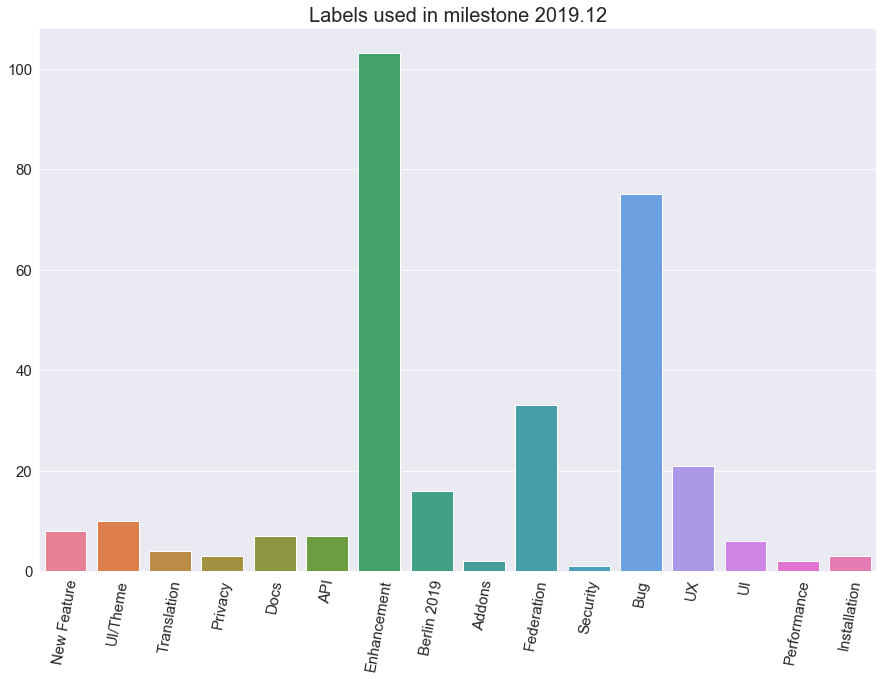

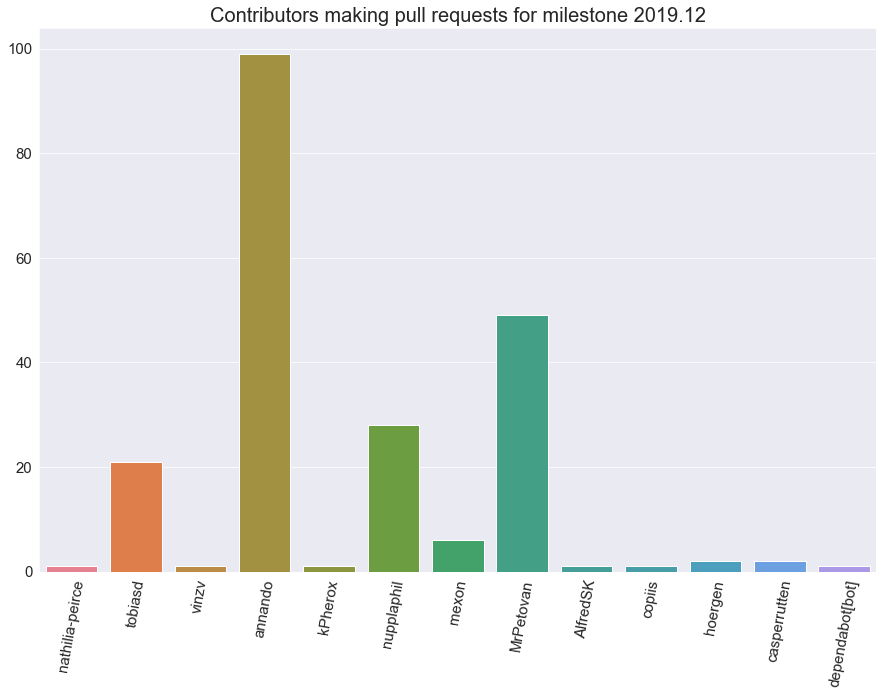

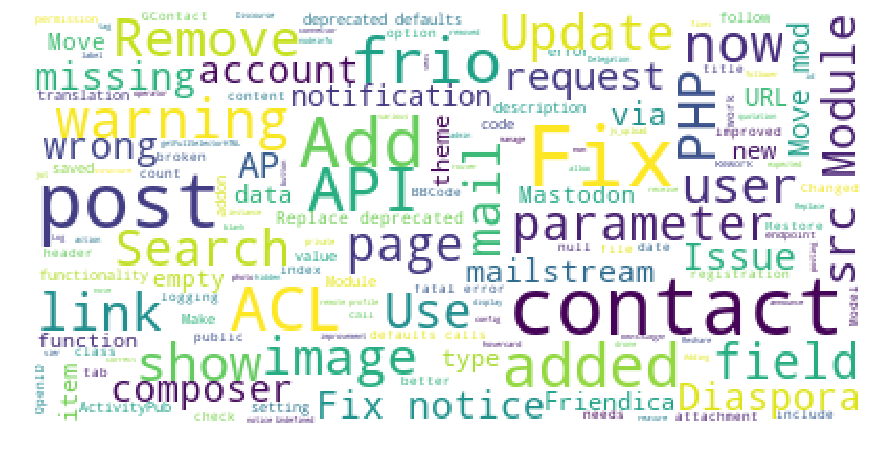

In [119]:
x = []
y = []
plt.figure(figsize=(15,10))
for k in alllabels:
    x.append(k)
    y.append(alllabels[k])
chart = sns.barplot(x,y,palette=pal)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
chart.axes.set_title("Labels used in milestone {}".format(ms.title),fontsize=20)
chart.tick_params(labelsize=15)
plt.show()
x = []
y = []
plt.figure(figsize=(15,10))
for k in allcontributors:
    x.append(k)
    y.append(allcontributors[k])
chart = sns.barplot(x,y,palette=pal)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
chart.axes.set_title("Contributors making pull requests for milestone {}".format(ms.title),fontsize=20)
chart.tick_params(labelsize=15)
plt.show()
wordcloud = WordCloud(max_font_size=40, background_color='white', relative_scaling=.5).generate(" ".join(titlewords).strip('.,:;-_()[]{}').replace('issue',''))
plt.figure(figsize=[15,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()